In [1]:
import tensorflow as tf
tf.__version__

'1.13.1'

In [50]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [21]:
len(x_train)

60000

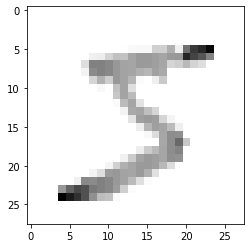

In [22]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)

In [23]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [51]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=4)

Epoch 1/4
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3212 - acc: 0.9112
Epoch 2/4
60000/60000 [==============================] - 4s 68us/sample - loss: 0.1498 - acc: 0.9557
Epoch 3/4
60000/60000 [==============================] - 4s 70us/sample - loss: 0.1032 - acc: 0.9690
Epoch 4/4
60000/60000 [==============================] - 5s 78us/sample - loss: 0.0758 - acc: 0.9776


In [52]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 50us/sample - loss: 0.0933 - acc: 0.9709
0.09333957618251443 0.9709


In [53]:
model.save('saved_mnist.model')

In [55]:
model_l = tf.keras.models.load_model('saved_mnist.model')

In [61]:
p = model_l.predict(x_test)

6

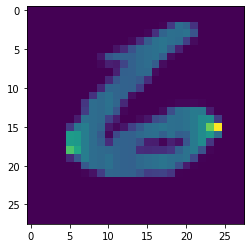

In [77]:
# Based on sentdex's https://www.youtube.com/watch?v=wQ8BIBpya2k&t=850s
import numpy as np
t = 9999
plt.imshow(x_test[t])
np.argmax(p[t])